# Lab 1

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
edges=np.loadtxt("C:/Users/Rpl/Downloads/test.txt",skiprows=4,dtype="i8,i8")
G=nx.Graph()
G.add_edges_from(edges)
from scipy import stats
from scipy.stats import powerlaw

## number of vertices, number of edges, number of connected components

In [3]:
Nodes_number=nx.number_of_nodes(G)
Edges_number=nx.number_of_edges(G)
number_of_cc=nx.number_connected_components(G)
print Nodes_number,"Nodes_number"
print Edges_number,"Edges_number"
print number_of_cc,"number_of_cc"

6596 Nodes_number
293320 Edges_number
10 number_of_cc


## This graph is unconnected so we cannot find radius and diametr. We can only find radius and diametr for connected components. Let's do this for the largest one.

In [7]:
G1=list(nx.connected_component_subgraphs(G, copy=False))
for g in G1:
    print (nx.number_of_edges(g))
G2=G1[0]
print "Radius", nx.radius(G2)
print "Diametr", nx.diameter(G2)

 293307
1
2
1
1
1
1
1
3
2
Radius 5
Diametr 9


# Now let's look on degree distribution and plot histogramm.

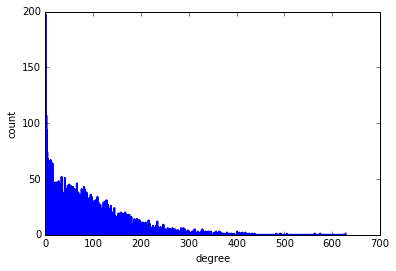

In [4]:
x=sorted(nx.degree(G).values(),reverse=True) 
yh, binEdges=np.histogram(x, bins=2000)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters, yh, '-', lw=2)
plt.ylabel('count')
plt.xlabel('degree')

### Let's try to look on  $log(count)=a*log(degree)$ dependence. We look on it because it show the powerlaw dependence $e^{log(count)}=e^{a*log(degree)}\approx degree^a$ 

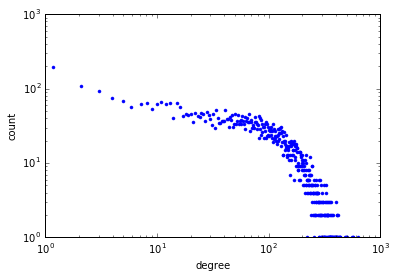

In [20]:
plt.loglog(bincenters, yh, '.', lw=2)
plt.ylabel('count')
plt.xlabel('degree')

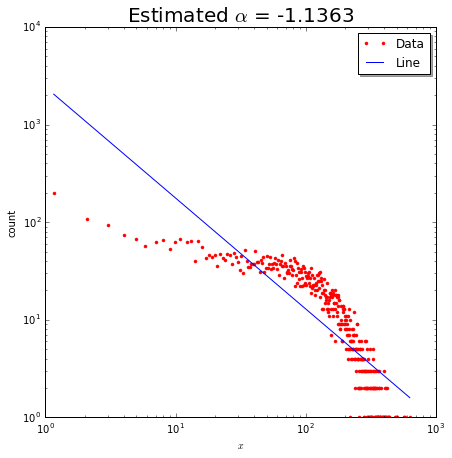

In [21]:
# Move zeros away!
idx = np.ix_(yh != 0)
x_est = np.log(bincenters[idx])
y_est = np.log(yh[idx])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters, yh, '.r', label='Data') 
ax.loglog(xt, yt, 'b', label='Line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right', shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(Beta[1]), fontsize=20)

1) Does it satisfy power law?
### Unfortuanetly degree distribution does not look like powerlow distribution. Now let's look on shortest path distribution on our graph, we will just take sample of nodes from our graph to calculate faster.

In [9]:
G3=G.subgraph(np.random.choice(G.nodes(),size=1e3,replace=True))
SPL=nx.shortest_path_length(G3)
l=list()
for i in G3.nodes():
    for j in SPL[i].keys():
        l.append(SPL[i][j])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


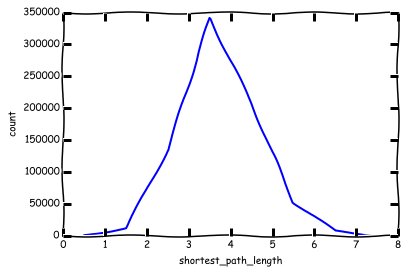

In [43]:
# Plot histogramm

yh, binEdges=np.histogram(l, bins=8)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters, yh, '-', lw=2)
plt.plot()
plt.ylabel('count')
plt.xlabel('shortest_path_length')

### On plot it looks like normal or poisson distribution but unfortuanetly kolm.-smirn. rejected hypothesis about this distribution. So the distribution of shortest path is not poisson and cannot be approximate with normal distribution.

In [110]:
rvs1 = stats.norm.rvs(size=200, loc=np.mean(l), scale=np.var(l))
rvs2 = stats.poisson.rvs(np.mean(l),size=300)
print stats.ks_2samp(l, rvs1)
print stats.ks_2samp(l, rvs2)

Ks_2sampResult(statistic=0.31613333620407769, pvalue=4.2578193972623852e-18)
Ks_2sampResult(statistic=0.23538936487922463, pvalue=4.5436773664962114e-15)


## Task 2 Find max and mean values of incoming and outcoming node degrees.

In [23]:
print "mean_degree", np.mean(x)
print "max_degree", max(x)

mean_degree 88.938750758
max_degree 628


## Compute Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

In [6]:
log_x=np.log(x)
a=1+len(x)*(1/sum(log_x))
print a, "a"
sigma=(a-1)/np.sqrt(len(x))
print sigma, "sigma"

1.255330766 a
0.00314385729638 sigma


4) Determine $x_{min}$ via Kolmogorov-Smirnov test

In [13]:
x=sorted(x)
Dabs=10000000
for xmin in np.linspace(0.1,2, num=1000):
    D=0
    emperic=list()
    theory=list()
    for i in range(len(x)):
        if (i<(len(x)-1) and x[i]!=x[i+1]):
            #generate empiric and theorethic distribution function
            emperic+=[(i+1.0)/len(x)]
            theory+=[1 - pow(x[i]/xmin, -a+1)]
            current=abs((i+1.0)/len(x)-(1 - pow(x[i]/xmin, -a+1)))
            # try to find the maximum distance between two 
            if D<current:
                D=current
                xopt=x[i]
    #minimize this distance using xmin from range above             
    if Dabs>D:
        xoptabs=xmin
        Dabs=D
        
        
        
print "optimal xmin", xoptabs 


optimal xmin 1.80790790791


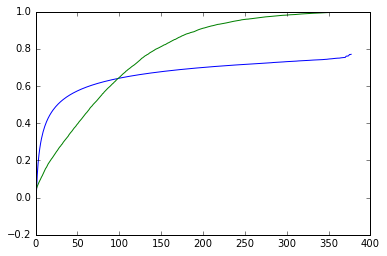

In [14]:
xmin=xoptabs
emperic=list()
theory=list()
for i in range(len(x)):
        if (i<(len(x)-1) and x[i]!=x[i+1]):
            emperic+=[(i+1.0)/len(x)]
            theory+=[1 - pow(x[i]/xmin, -a+1)]

plt.plot(theory)
plt.plot(emperic)
plt.show()

## So as expected degree distribution does not sitisfy powerlow. Results can be seen from test and plot. 